# IHSG Return Triangle

In [236]:
import pandas as pd 
from pandas_datareader import data as wb
import yfinance 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

In [237]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [238]:
yfinance.pdr_override()

In [239]:
ihsg_close = wb.get_data_yahoo('^JKSE', start ='1992-12-30', end ='2022-12-31')[['Close']]

[*********************100%***********************]  1 of 1 completed


In [240]:
ihsg_close.tail()

,Close
Date,
2022-12-26,6835.80811
2022-12-27,6923.02686
2022-12-28,6850.52002
2022-12-29,6860.07715
2022-12-30,6850.61914


In [241]:
ihsg_close_copy = ihsg_close.copy()

## Getting Last Price of Every Year

In [242]:
annual = ihsg_close_copy.resample("A", kind = "period").last()
annual.head()

,Close
Date,
1992,274.34000
1993,588.77002
1994,469.64001
1995,513.84998
1996,637.43201


## Getting Yearly Log Return

In [243]:
annual['log_return'] = np.log(annual['Close'] / annual['Close'].shift(1))
annual_dollar = annual.copy()
annual.head()

,Close,log_return
Date,,
1992,274.34000,NaN
1993,588.77002,0.76367
1994,469.64001,-0.22607
1995,513.84998,0.08996
1996,637.43201,0.21552


In [244]:
annual.dropna(inplace = True)

In [245]:
annual.head()

,Close,log_return
Date,,
1993,588.77002,0.76367
1994,469.64001,-0.22607
1995,513.84998,0.08996
1996,637.43201,0.21552
1997,401.71201,-0.46171


### getting Index Size to be Looped 

In [246]:
years = annual.index.size
years

30

In [247]:
windows = [year for year in range(years,0,-1)]
windows

[30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1]

### Loop to Get Yearly Rolling Return Return

In [248]:
for year in windows : 
    annual[f'{year}Y'] = annual['log_return'].rolling(year).mean()

### Creating Triangle Return

In [249]:
annual

,Close,log_return,30Y,29Y,28Y,27Y,26Y,25Y,24Y,23Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1993,588.77002,0.76367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.76367
1994,469.64001,-0.22607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.26880,-0.22607
1995,513.84998,0.08996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20919,-0.06805,0.08996
1996,637.43201,0.21552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.21077,0.02647,0.15274,0.21552
1997,401.71201,-0.46171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.07627,-0.09558,-0.05208,-0.12310,-0.46171
1998,398.03799,-0.00919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.06203,-0.07830,-0.04135,-0.08513,-0.23545,-0.00919
1999,676.91901,0.53100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.12903,0.02325,0.07312,0.06891,0.02003,0.26091,0.53100
2000,416.32101,-0.48609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.05214,-0.04951,-0.02008,-0.04209,-0.10650,0.01191,0.02245,-0.48609
2001,392.03601,-0.06010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.03967,-0.05084,-0.02580,-0.04510,-0.09722,-0.00610,-0.00506,-0.27310,-0.06010


In [250]:
triangle = annual.drop(columns = ["Close", "log_return"])

In [251]:
triangle.head()

,30Y,29Y,28Y,27Y,26Y,25Y,24Y,23Y,22Y,21Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.76367
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.26880,-0.22607
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20919,-0.06805,0.08996
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.21077,0.02647,0.15274,0.21552
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.07627,-0.09558,-0.05208,-0.12310,-0.46171


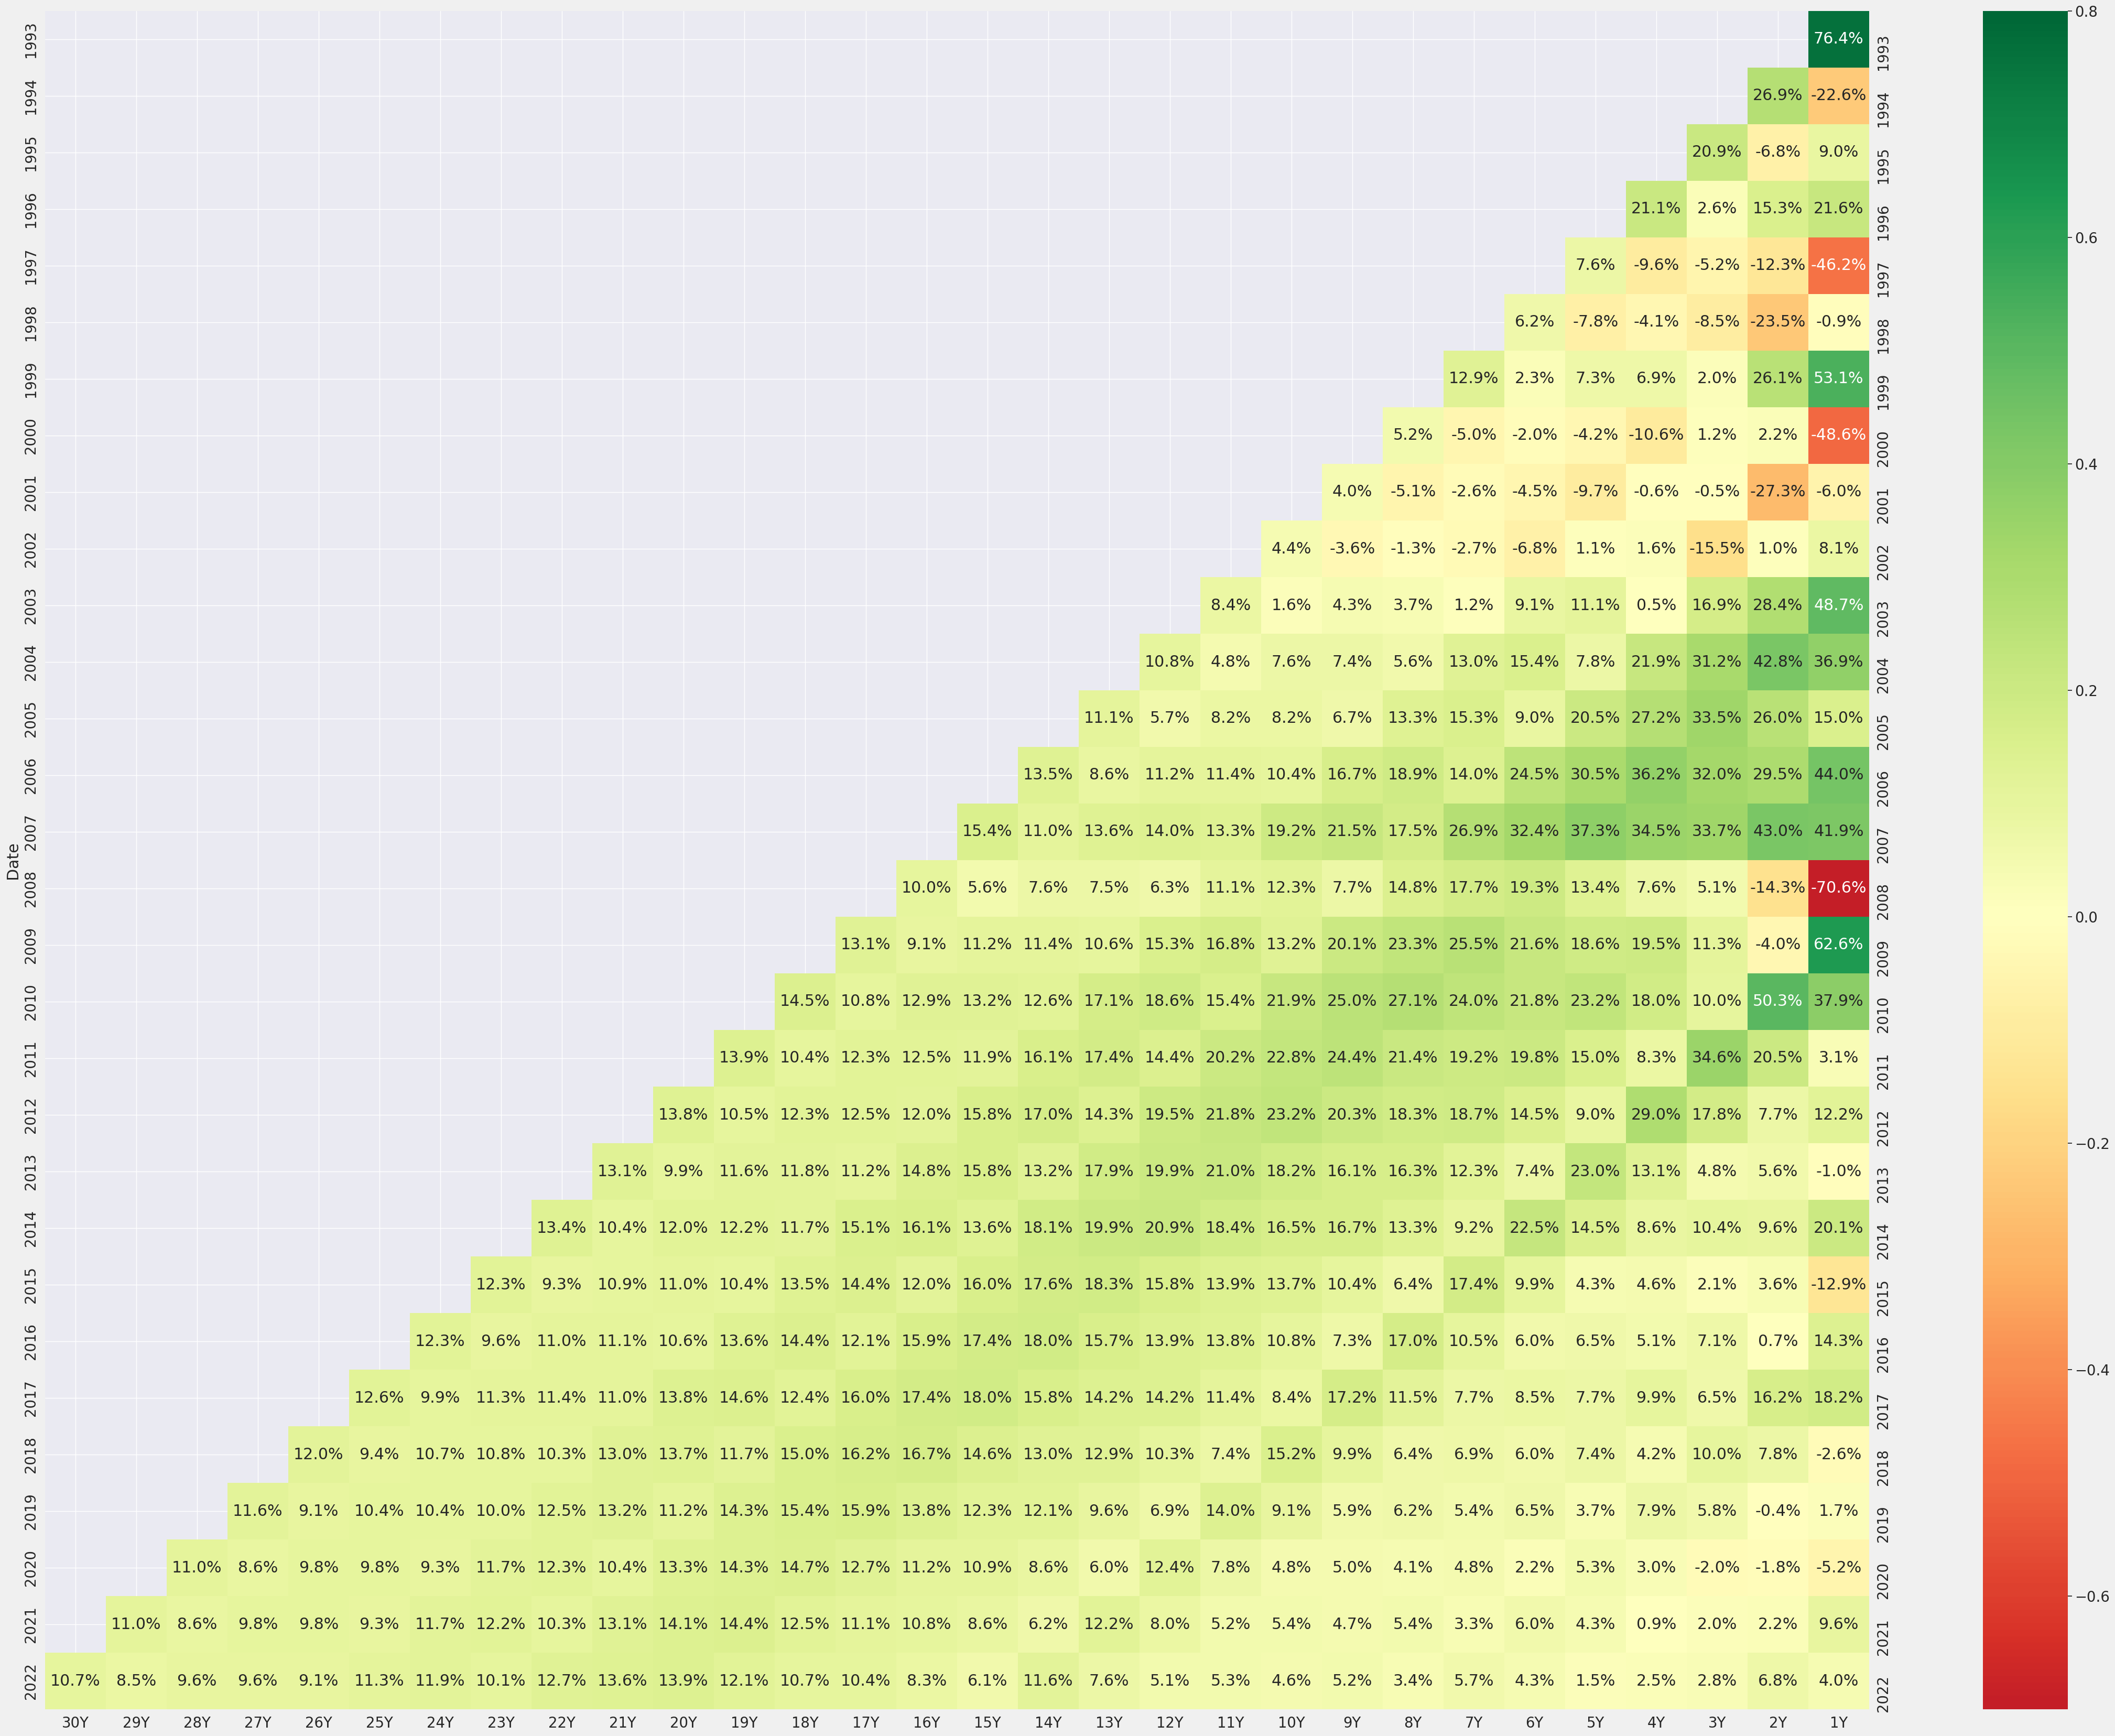

In [252]:
plt.figure(figsize = (50,40))
sns.set(font_scale = 1.8)
sns.heatmap(triangle, annot = True, fmt = '.1%', cmap = "RdYlGn",
           vmin = -0.7, vmax = 0.8, center = 0)
plt.tick_params(axis = "y",labelright = True)
plt.savefig('ihsg_return.png',bbox_inches='tight')

## Return Triangle in Dollar Value

In [253]:
annual_dollar.dropna(inplace = True)
annual_dollar.head()

,Close,log_return
Date,,
1993,588.77002,0.76367
1994,469.64001,-0.22607
1995,513.84998,0.08996
1996,637.43201,0.21552
1997,401.71201,-0.46171


In [254]:
for year in windows : 
    annual_dollar[f'{year}Y'] = np.exp(year * annual_dollar['log_return'].rolling(year).mean()) * 3

In [255]:
triangle_dollar = annual_dollar.drop(columns = ['Close', 'log_return'])
triangle_dollar

,30Y,29Y,28Y,27Y,26Y,25Y,24Y,23Y,22Y,21Y,...,10Y,9Y,8Y,7Y,6Y,5Y,4Y,3Y,2Y,1Y
Date,,,,,,,,,,,,,,,,,,,,,
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.43840
1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.13567,2.39299
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.61912,2.61825,3.28241
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.97053,3.24795,4.07183,3.72151
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.39286,2.04687,2.56608,2.34531,1.89061
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.35268,2.02815,2.54262,2.32386,1.87332,2.97256
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.40234,3.44915,4.32407,3.95204,3.18584,5.05526,5.10192
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.55261,2.12131,2.65941,2.43060,1.95937,3.10910,3.13780,1.84507
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.28705,1.99757,2.50428,2.28882,1.84507,2.92774,2.95476,1.73744,2.82500


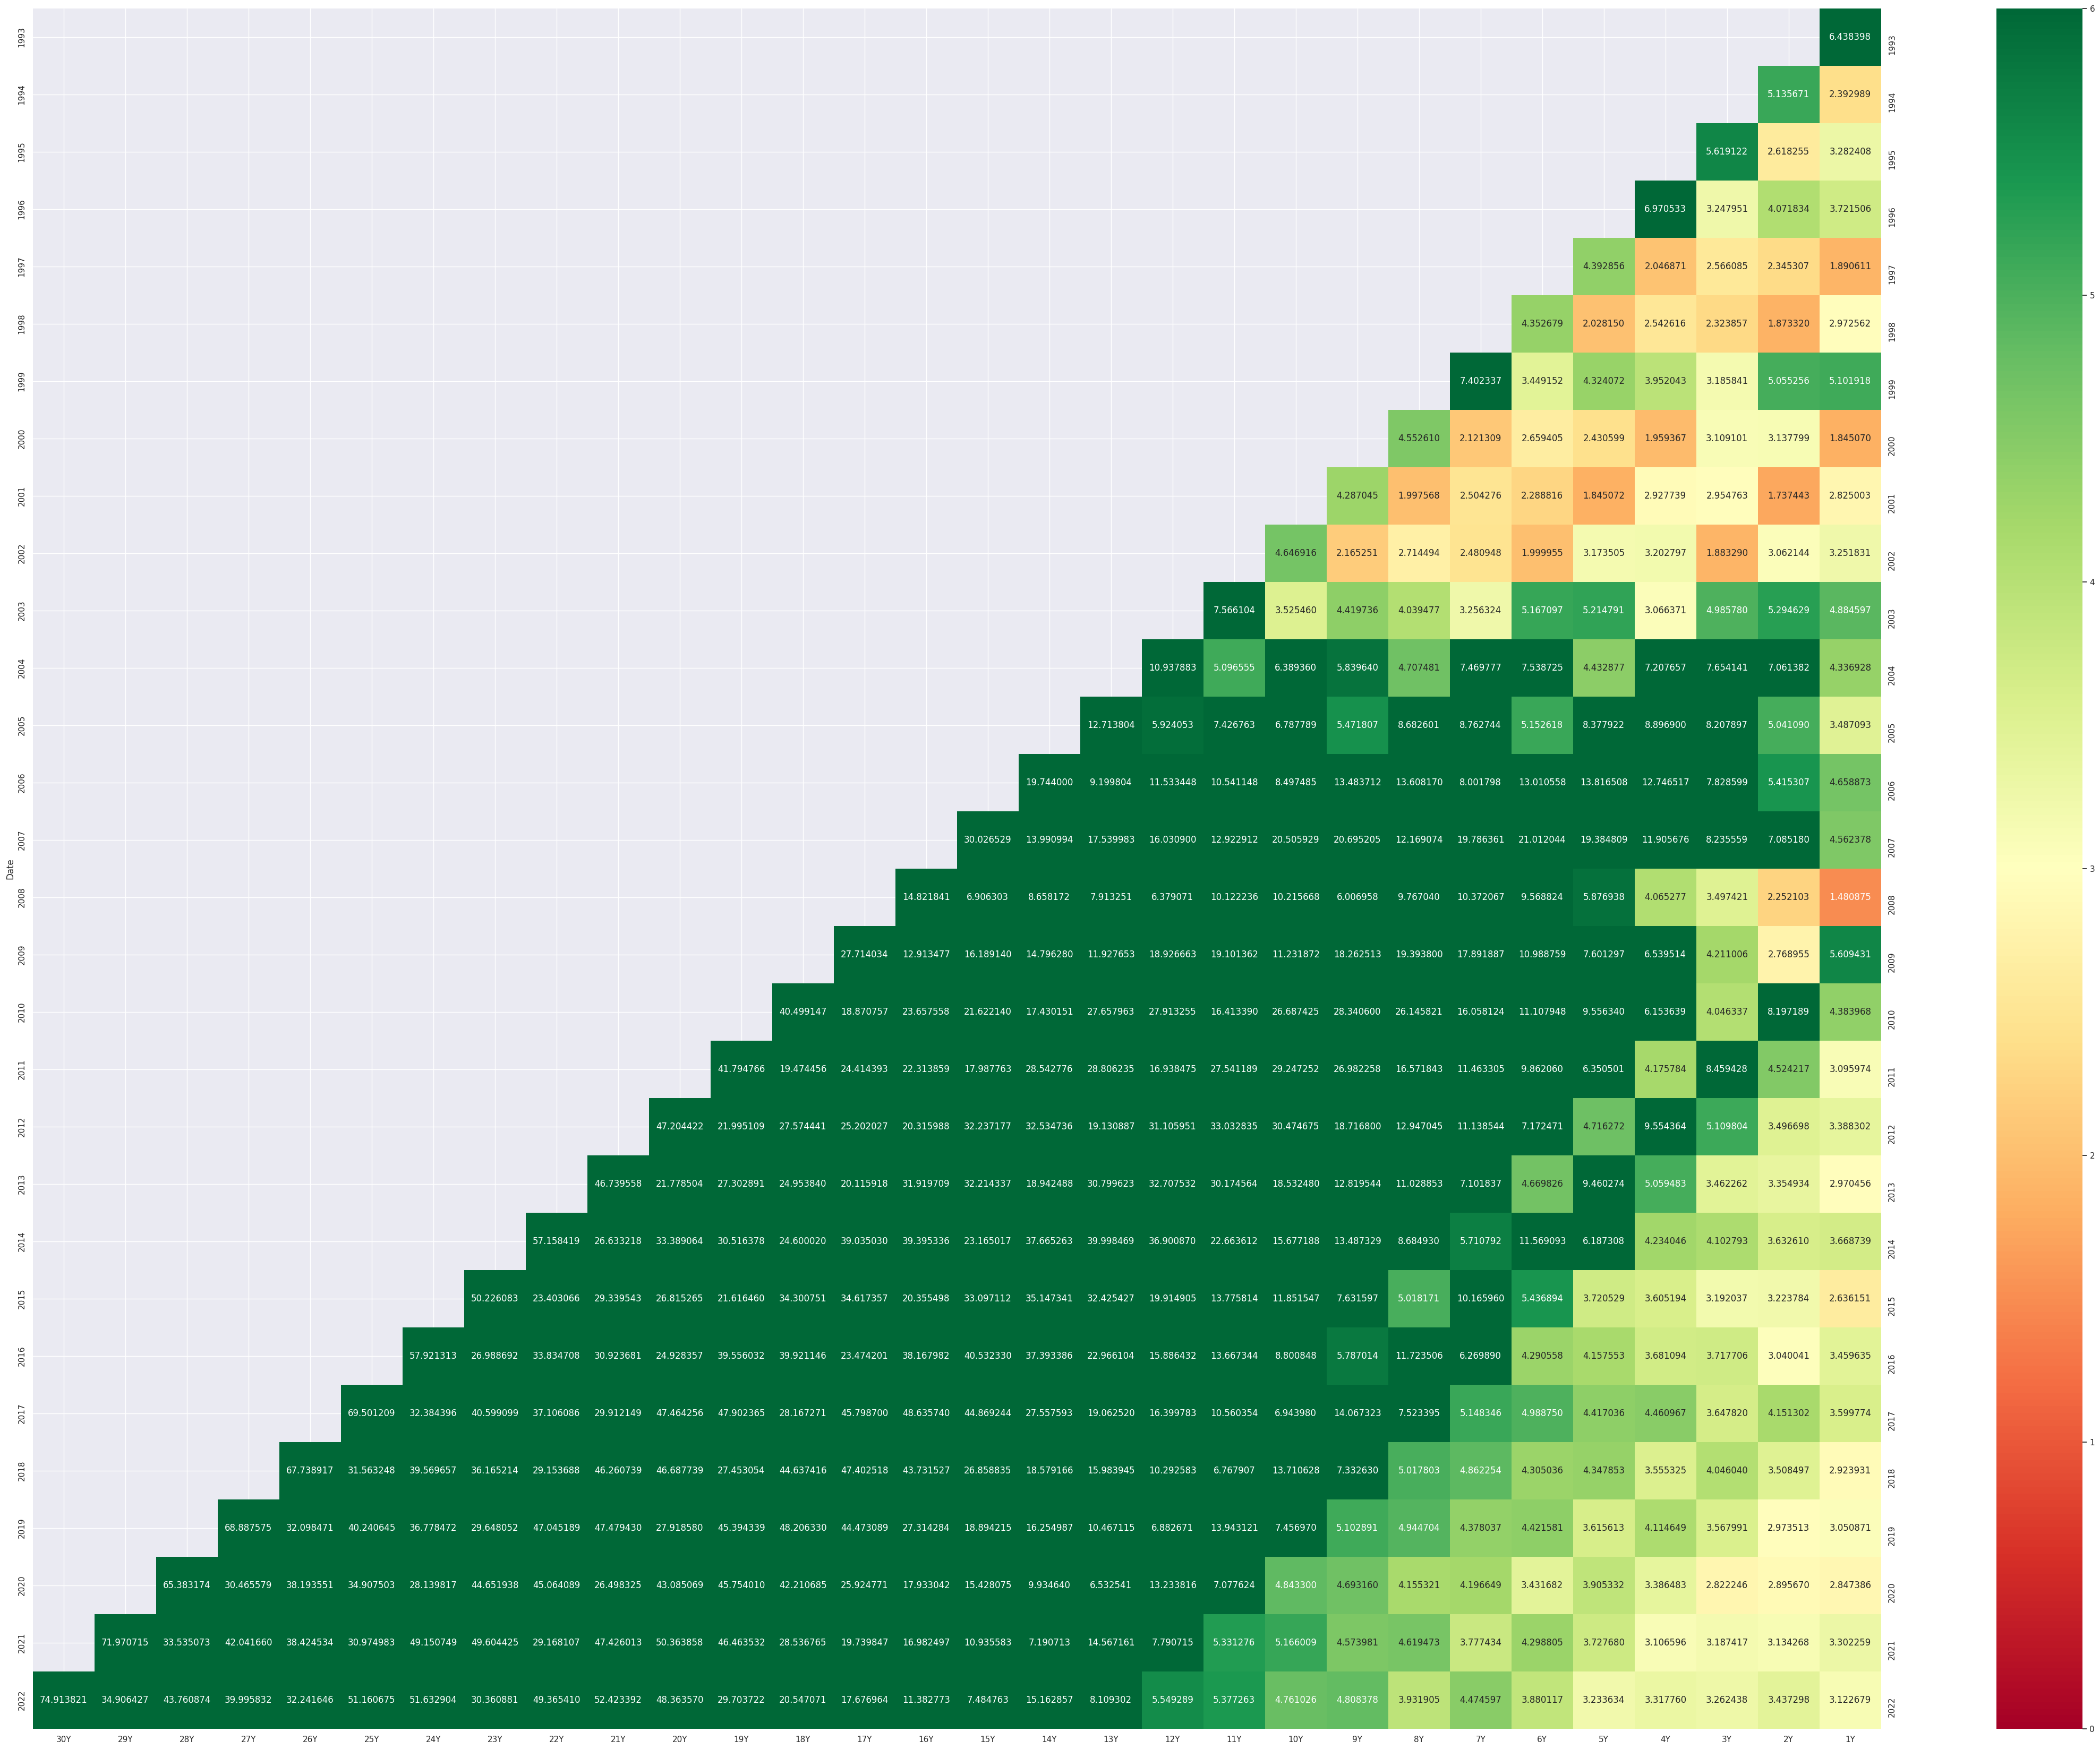

In [256]:
plt.figure(figsize = (50,40))
sns.set(font_scale = 1)
sns.heatmap(triangle_dollar, annot = True, cmap = "RdYlGn", fmt = '00f', vmax = 6, vmin = 0, center = 3)
plt.tick_params(axis = "y",labelright = True)
plt.savefig('ihsg_return.png',bbox_inches='tight')